Number of rows: 7043
Number of columns: 21
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract  

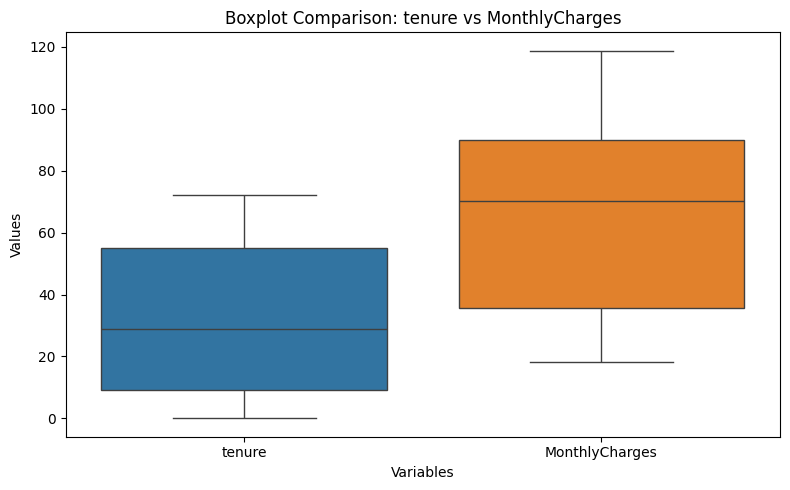

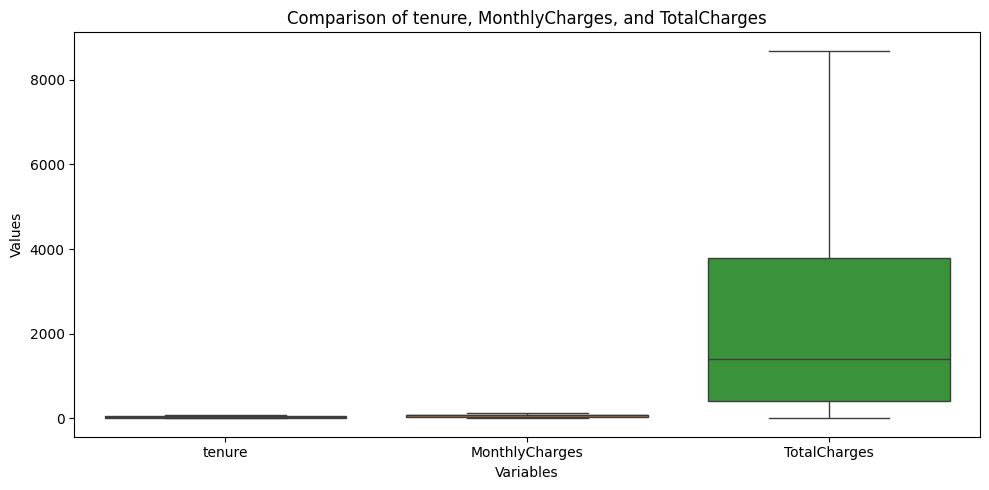

tenure: correlation = -0.352, p-value = 7.999e-205
MonthlyCharges: correlation = 0.193, p-value = 2.707e-60
TotalCharges: correlation = -0.242, p-value = 1.291e-94
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64




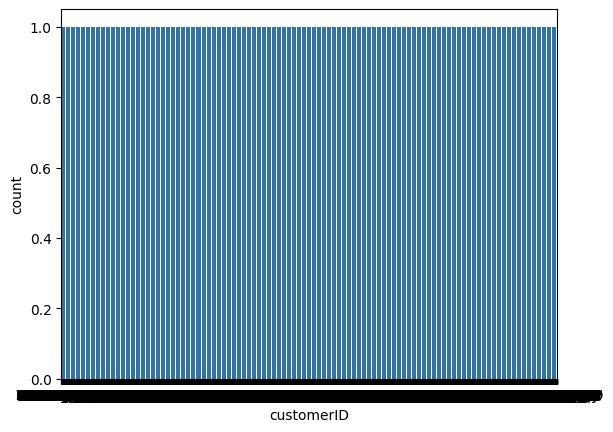

-------------------------
gender
Male      3555
Female    3488
Name: count, dtype: int64




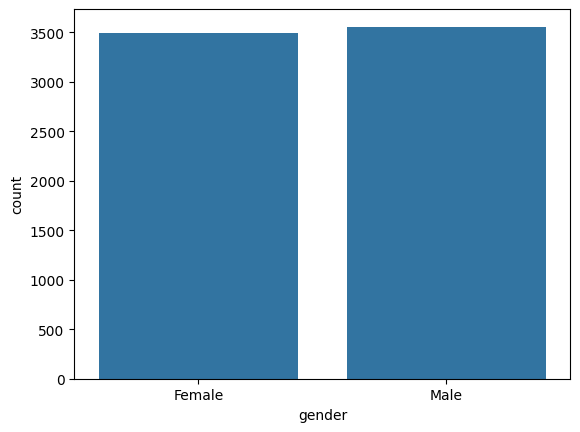

-------------------------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64




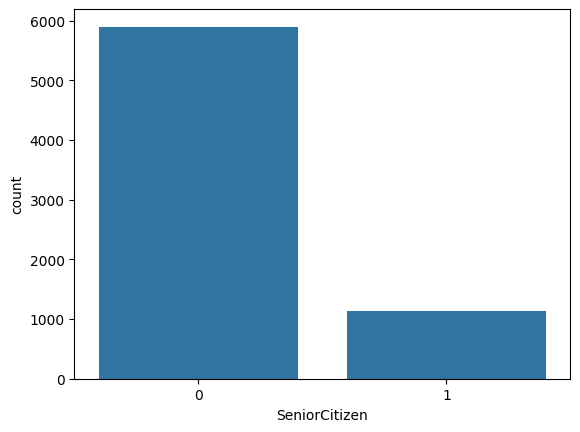

-------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64




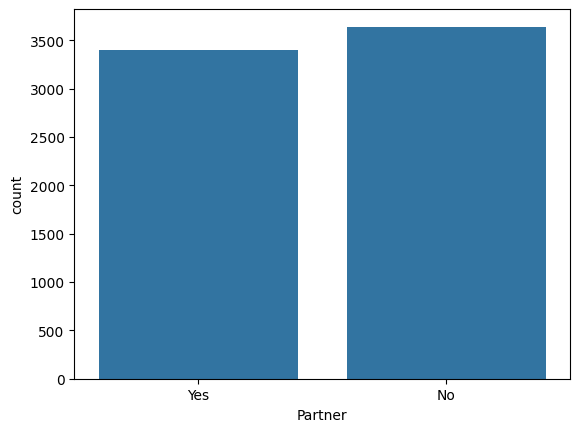

-------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64




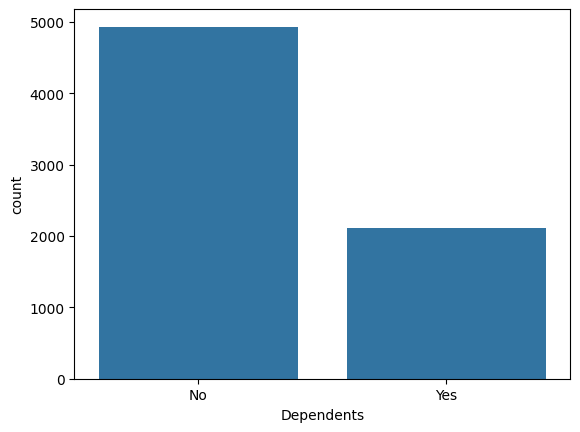

-------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64




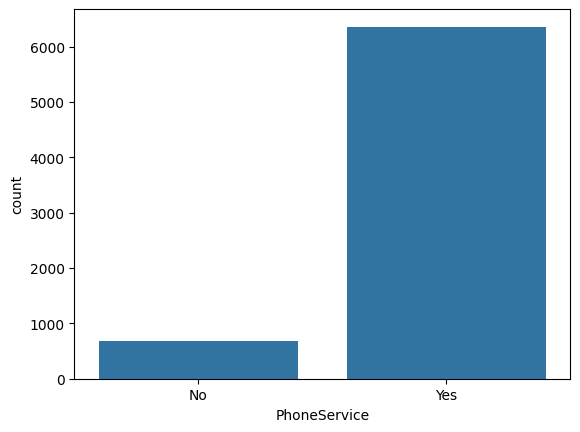

-------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64




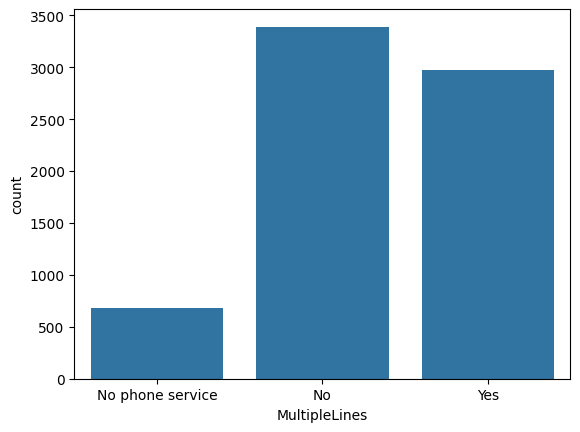

-------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64




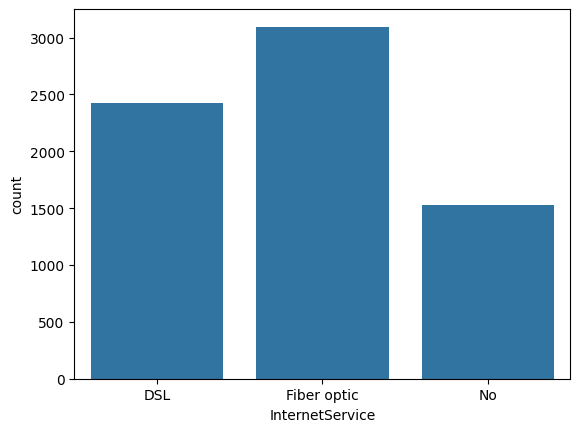

-------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64




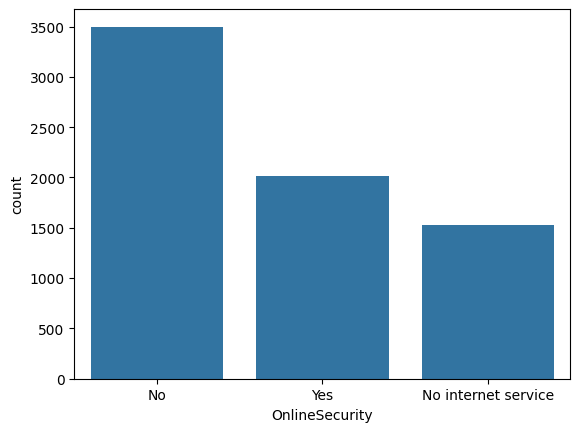

-------------------------
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64




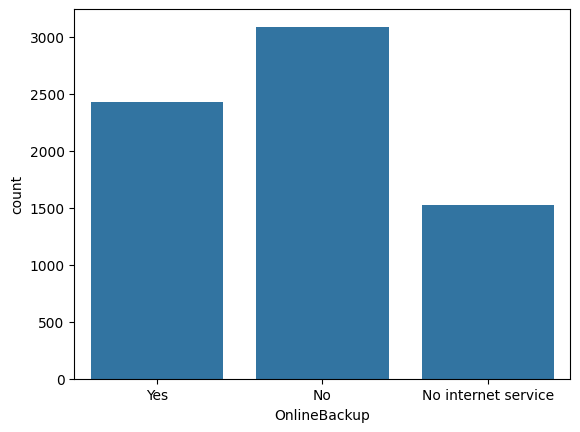

-------------------------
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64




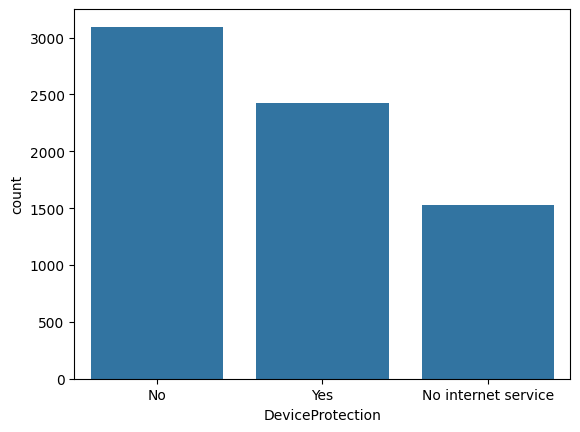

-------------------------
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64




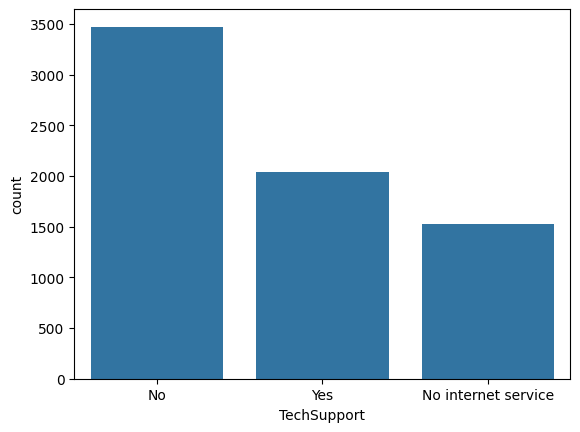

-------------------------
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64




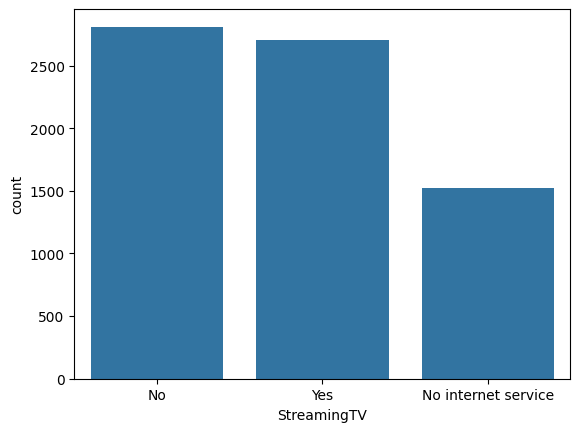

-------------------------
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64




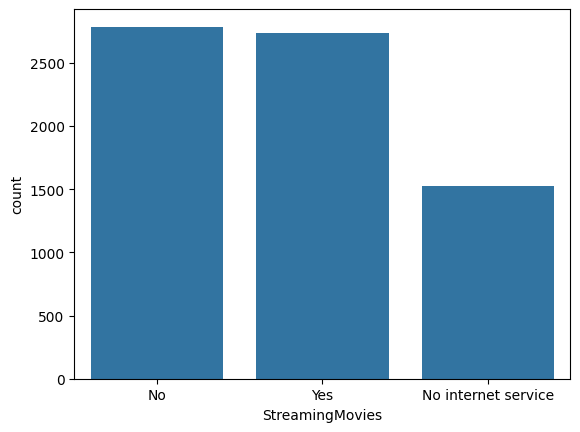

-------------------------
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64




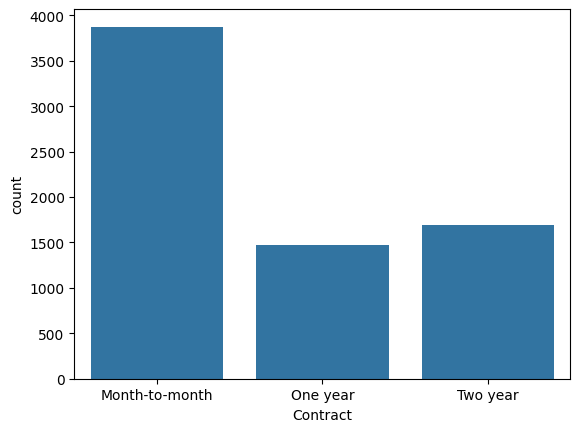

-------------------------
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64




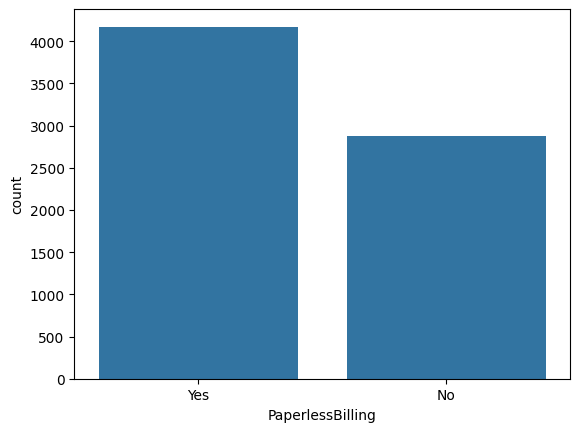

-------------------------
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64




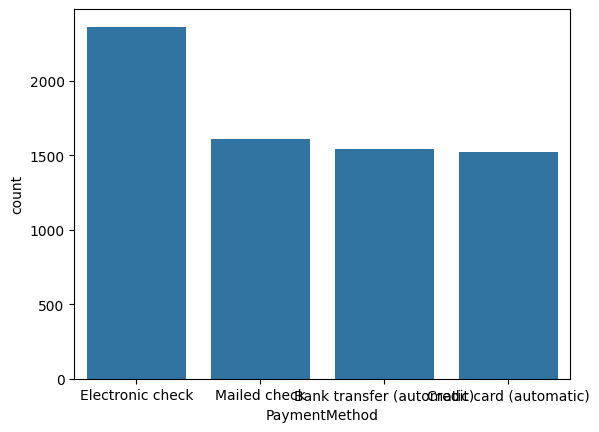

-------------------------
Churn
No     5174
Yes    1869
Name: count, dtype: int64




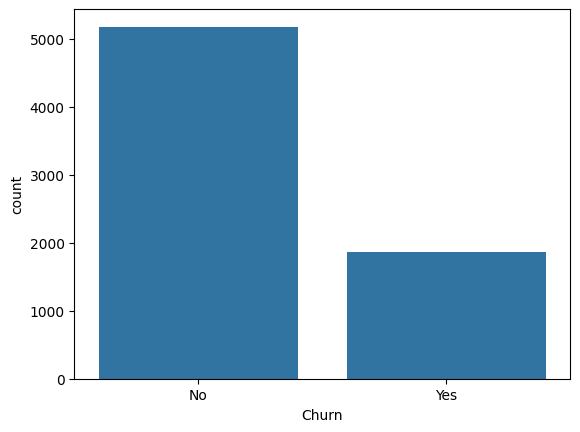

-------------------------
tenure: correlation = -0.352, p-value = 7.999e-205

MonthlyCharges: correlation = 0.193, p-value = 2.707e-60

TotalCharges: correlation = -0.242, p-value = 1.291e-94

gender: correlation = -0.009, p-value = 4.699e-01

SeniorCitizen: correlation = 0.151, p-value = 3.840e-37

Partner: correlation = -0.150, p-value = 6.221e-37

Dependents: correlation = -0.164, p-value = 9.140e-44

PhoneService: correlation = 0.012, p-value = 3.163e-01

PaperlessBilling: correlation = 0.192, p-value = 2.357e-59

Contract_One year: correlation = -0.178, p-value = 3.987e-51

Contract_Two year: correlation = -0.302, p-value = 1.048e-148

DeviceProtection_No internet service: correlation = -0.228, p-value = 1.201e-83

DeviceProtection_Yes: correlation = -0.066, p-value = 2.738e-08

InternetService_Fiber optic: correlation = 0.308, p-value = 1.201e-154

InternetService_No: correlation = -0.228, p-value = 1.201e-83

MultipleLines_No phone service: correlation = -0.012, p-value = 3.163e

/tmp/ipython-input-258826149.py:93: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_features] = df[binary_features].replace({'Yes':1,'No':0,'Male':1,'Female':0}).astype(int)


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import pointbiserialr

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(10)  # Preview first 10 rows
#--------------------------------------------------
# Check dataset size and data types
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(df.dtypes)

# Convert SeniorCitizen to categorical and TotalCharges to numeric
df["SeniorCitizen"] = df["SeniorCitizen"].astype("category")
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
#--------------------------------------------------
# Check for null values
print(df.isnull().sum())
print(df[df.isnull().any(axis=1)].to_string(max_cols=25))
#-------------------
# Fill missing TotalCharges with mean
mean_total = df['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].fillna(mean_total)
print(df['TotalCharges'].isnull().sum())  # Should be 0 now
#--------------------------------------------
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Duplicate rows: ", duplicates)
#----------------------------------------------------
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns: ", num_cols)
print("Categorical columns: ", cat_cols)
#-------------------------
# Summary statistics for numerical features
print(df.describe())
#-------------------------
# Outlier detection using IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} outliers")
#-------------------------------------
# Visualize numerical features with boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["tenure", "MonthlyCharges"]])
plt.title("Boxplot Comparison: tenure vs MonthlyCharges")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["tenure", "MonthlyCharges", "TotalCharges"]])
plt.title("Comparison of tenure, MonthlyCharges, and TotalCharges")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.tight_layout()
plt.show()
#-------------------------------
# Log-transform TotalCharges to reduce right skew
df['TotalCharges'] = np.log1p(df['TotalCharges'])

# Standardize numerical features
scaler = StandardScaler()
numerical_cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

#------------------Correlation with target
for col in num_cols:  # Check correlation of numeric features with Churn
    corr, p = pointbiserialr(df[col], df['Churn'].map({'No':0,'Yes':1}))
    print(f'{col}: correlation = {corr:.3f}, p-value = {p:.3e}')
#------------------------------------
# Explore categorical feature distributions
for col in cat_cols:
    print(df[col].value_counts())
    sns.countplot(x=col, data=df)
    print()
    print()
    plt.show()
    print("-------------------------")

#-----Convert binary categorical features to 0/1
df['Churn_bin'] = df['Churn'].map({'No':0, 'Yes':1})
binary_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df[binary_features] = df[binary_features].replace({'Yes':1,'No':0,'Male':1,'Female':0}).astype(int)

#------One-hot encode multi-category features
multi_cat_features = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                      'StreamingTV','StreamingMovies','InternetService','Contract','PaymentMethod']
df = pd.get_dummies(df, columns=multi_cat_features, drop_first=True)

#---------------------------------------
# Combine all features for correlation analysis
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
all_features = numeric_features + binary_features + list(df.columns.difference(numeric_features + binary_features + ['customerID', 'Churn', 'Churn_bin']))

for col in all_features:
    corr, p = pointbiserialr(df[col], df['Churn_bin'])
    print(f'{col}: correlation = {corr:.3f}, p-value = {p:.3e}')
    print()
#-------------------------------------------
# Drop irrelevant or low-correlation columns
drop_cols_to_filter = [
    'customerID',  # Identifier, no predictive value
    'gender',  # Low correlation
    'PhoneService',  # Low correlation
    'MultipleLines_No phone service',  # Redundant
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service',
    'InternetService_No',
    'Churn'  # Original target column, use Churn_bin instead
]

final_drop_cols = [col for col in drop_cols_to_filter if col in df.columns]
df.drop(columns=final_drop_cols, inplace=True)
print(df.columns)  # Check remaining columns


In [32]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Churn_bin'])
y = df['Churn_bin']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Target distribution in train:")
print(y_train.value_counts(normalize=True))
print("\nTarget distribution in test:")
print(y_test.value_counts(normalize=True))


Train shape: (5634, 20)
Test shape: (1409, 20)
Target distribution in train:
Churn_bin
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Target distribution in test:
Churn_bin
0    0.734564
1    0.265436
Name: proportion, dtype: float64


Random Forest Accuracy: 0.7849538679914834
Random Forest AUC: 0.8226226458963032

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



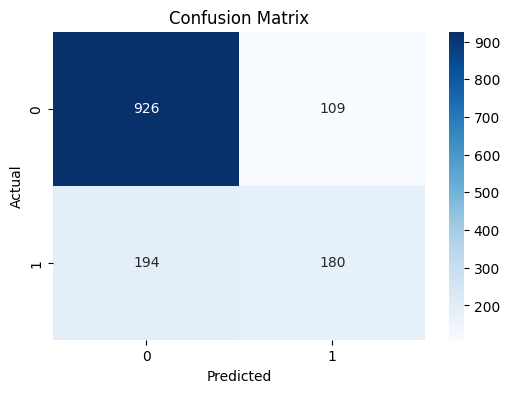

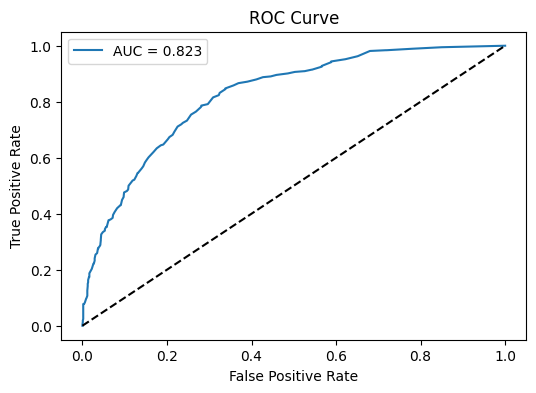

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve



rf = RandomForestClassifier( n_estimators=100,random_state=42,class_weight="balanced")
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]   # probabilities for AUC/ROC
# -----------------------------
# Evaluation Metrics
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Random Forest Accuracy:", accuracy)
print("Random Forest AUC:", auc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# -----------------------------
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# -----------------------------
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(random_state=42, class_weight="balanced")

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(X_res, y_res)
best_params = grid.best_params_
print("Best Hyperparameters:", best_params)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
aucs = []

fold = 1
for train_idx, val_idx in skf.split(X_res, y_res):

    X_fold_train, X_fold_val = X_res.iloc[train_idx], X_res.iloc[val_idx]
    y_fold_train, y_fold_val = y_res.iloc[train_idx], y_res.iloc[val_idx]

    rf_best = RandomForestClassifier(**best_params, random_state=42, class_weight="balanced")
    rf_best.fit(X_fold_train, y_fold_train)

    y_pred = rf_best.predict(X_fold_val)
    y_prob = rf_best.predict_proba(X_fold_val)[:, 1]

    acc = accuracy_score(y_fold_val, y_pred)
    auc = roc_auc_score(y_fold_val, y_prob)

    accuracies.append(acc)
    aucs.append(auc)

    print(f"Fold {fold} - Accuracy: {acc:.3f}, AUC: {auc:.3f}")
    print(classification_report(y_fold_val, y_pred))
    print("-"*40)

    fold += 1

print(f"Average Accuracy: {np.mean(accuracies):.3f}")
print(f"Average AUC: {np.mean(aucs):.3f}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Fold 1 - Accuracy: 0.825, AUC: 0.903
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       828
           1       0.81      0.85      0.83       828

    accuracy                           0.83      1656
   macro avg       0.83      0.83      0.83      1656
weighted avg       0.83      0.83      0.83      1656

----------------------------------------
Fold 2 - Accuracy: 0.838, AUC: 0.912
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       828
           1       0.82      0.87      0.84       828

    accuracy                           0.84      1656
   macro avg       0.84      0.84      0.84      1656
weighted avg       0.84      0.84      0.84      1656

----------------------------------------
Fold 3 - Accuracy: 0.839, AUC: 0.919
              precision    recall  f1-score

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Accuracy: 0.7799858055358411
MLP AUC: 0.8250613552403834

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.58      0.59      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



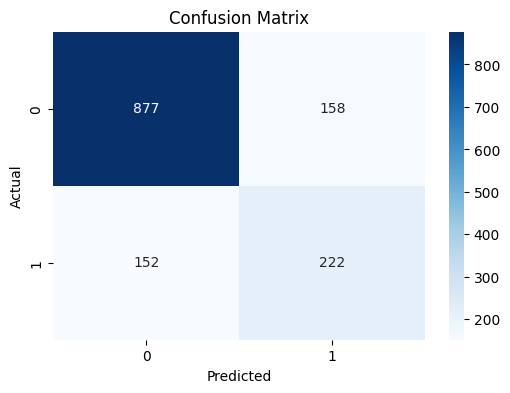

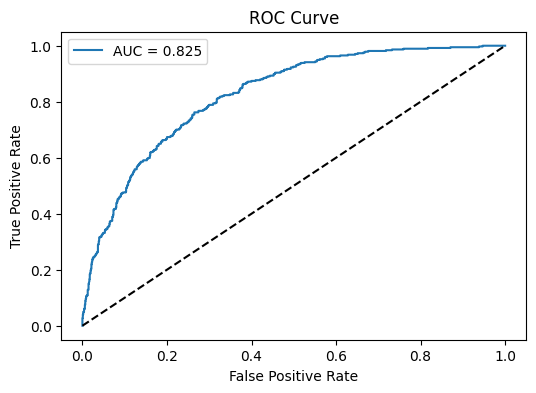

In [34]:
from sklearn.neural_network import MLPClassifier
# -------------------------
# Basic MLP Classifier
# -------------------------
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)[:, 1]

# -------------------------
# Evaluation Metrics
# -------------------------
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("MLP Accuracy:", accuracy)
print("MLP AUC:", auc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -------------------------
# Confusion Matrix
# -------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------
# ROC Curve
# -------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline

#-----------------------------
# Create a pipeline to handle imbalanced data and model training
pipeline = ImbPipeline([
    ("smote", SMOTE(random_state=42)),  # Apply SMOTE to balance classes in training data
    ("mlp", MLPClassifier(random_state=42))  # Multi-layer Perceptron classifier
])

#-----------------------------
# Define hyperparameters to search over
param_grid = {
    "mlp__hidden_layer_sizes": [(64,), (128,)],  # Number of neurons in hidden layer(s)
    "mlp__activation": ["relu"],  # Activation function
    "mlp__learning_rate_init": [0.001, 0.01],  # Initial learning rate
    "mlp__max_iter": [1000]  # Maximum number of iterations
}

#-----------------------------
# Perform grid search with cross-validation
grid = GridSearchCV(
    estimator=pipeline,       # Pipeline including SMOTE + MLP
    param_grid=param_grid,    # Hyperparameters to tune
    cv=2,                     # 2-fold cross-validation
    scoring="f1_macro",       # Optimize for macro F1 score (good for imbalanced classes)
    n_jobs=-1,                # Use all CPU cores
    verbose=1                 # Print progress
)

# Fit the grid search to the training data
grid.fit(X_train, y_train)

#-----------------------------
# Get the best model from grid search
best_model = grid.best_estimator_
print("Best Params:", grid.best_params_)

#-----------------------------
# Make predictions on test set
y_pred = best_model.predict(X_test)       # Predicted classes
y_prob = best_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class

#-----------------------------
# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))  # Overall accuracy
print("AUC:", roc_auc_score(y_test, y_prob))          # Area Under the ROC Curve
print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Precision, Recall, F1

print("\nClassification Report:\n", classification_report(y_test, y_pred))



Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best Params: {'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': (128,), 'mlp__learning_rate_init': 0.001, 'mlp__max_iter': 1000}

Accuracy: 0.7508871540099361
AUC: 0.7992921542793666

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      1035
           1       0.53      0.64      0.58       374

    accuracy                           0.75      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      1035
           1       0.53      0.64      0.58       374

    accuracy                           0.75      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409



In [36]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold

#-----------------------------
# Set up stratified 5-fold cross-validation
# StratifiedKFold ensures each fold preserves the class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#-----------------------------
# Obtain cross-validated predicted probabilities for the positive class
y_prob_cv = cross_val_predict(
    best_model, X_train, y_train,
    cv=cv, method='predict_proba', n_jobs=-1  # Parallel computation
)[:, 1]  # Get probabilities for class 1 (churn)

#-----------------------------
# Convert probabilities to binary predictions using threshold 0.5
y_pred_cv = (y_prob_cv >= 0.5).astype(int)

#-----------------------------
# Evaluate model performance using cross-validated predictions
print("Cross-validated Accuracy (threshold=0.5):", accuracy_score(y_train, y_pred_cv))  # Accuracy
print("Cross-validated AUC:", roc_auc_score(y_train, y_prob_cv))                        # ROC AUC
print("\nClassification Report (threshold=0.5):\n", classification_report(y_train, y_pred_cv))  # Precision, Recall, F1

#-----------------------------
# Test alternative threshold for better minority-class recall
threshold = 0.45
y_pred_thresh = (y_prob_cv >= threshold).astype(int)

#-----------------------------
# Evaluate model with the new threshold
print(f"\nClassification Report (threshold={threshold}):\n", classification_report(y_train, y_pred_thresh))


Cross-validated Accuracy (threshold=0.5): 0.7538161164359247
Cross-validated AUC: 0.7954413560220466

Classification Report (threshold=0.5):
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      4139
           1       0.53      0.63      0.58      1495

    accuracy                           0.75      5634
   macro avg       0.69      0.71      0.70      5634
weighted avg       0.77      0.75      0.76      5634


Classification Report (threshold=0.45):
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      4139
           1       0.52      0.66      0.58      1495

    accuracy                           0.75      5634
   macro avg       0.69      0.72      0.70      5634
weighted avg       0.77      0.75      0.76      5634



In [37]:
from sklearn.metrics import f1_score, precision_recall_curve


precision, recall, thresholds = precision_recall_curve(y_train, y_prob_cv)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # add small epsilon to avoid division by zero

# Find the threshold with the maximum F1
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold:.3f}, Max F1: {f1_scores[optimal_idx]:.3f}")


y_pred_opt = (y_prob_cv >= optimal_threshold).astype(int)

# Evaluate performance
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print("\nClassification Report (optimal threshold):")
print(classification_report(y_train, y_pred_opt))
print("Accuracy:", accuracy_score(y_train, y_pred_opt))
print("AUC:", roc_auc_score(y_train, y_prob_cv))


Optimal threshold: 0.403, Max F1: 0.591

Classification Report (optimal threshold):
              precision    recall  f1-score   support

           0       0.87      0.76      0.82      4139
           1       0.52      0.69      0.59      1495

    accuracy                           0.75      5634
   macro avg       0.69      0.73      0.70      5634
weighted avg       0.78      0.75      0.76      5634

Accuracy: 0.745651402200923
AUC: 0.7954413560220466


In [38]:


# Optimal threshold
optimal_threshold = 0.403

# Stratified 5-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
aucs = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    # Split fold
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Apply SMOTE on training fold
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_fold_train, y_fold_train)

    # Fit the already tuned model
    best_model.fit(X_res, y_res)

    # Predict probabilities
    y_prob = best_model.predict_proba(X_fold_val)[:, 1]
    y_pred = (y_prob >= optimal_threshold).astype(int)

    # Metrics
    acc = accuracy_score(y_fold_val, y_pred)
    auc = roc_auc_score(y_fold_val, y_prob)
    accuracies.append(acc)
    aucs.append(auc)

    print(f"Fold {fold} - Accuracy: {acc:.3f}, AUC: {auc:.3f}")
    print(classification_report(y_fold_val, y_pred))
    print("-"*40)

print(f"Average Accuracy: {np.mean(accuracies):.3f}")
print(f"Average AUC: {np.mean(aucs):.3f}")


Fold 1 - Accuracy: 0.740, AUC: 0.785
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       828
           1       0.51      0.70      0.59       299

    accuracy                           0.74      1127
   macro avg       0.69      0.73      0.70      1127
weighted avg       0.78      0.74      0.75      1127

----------------------------------------
Fold 2 - Accuracy: 0.747, AUC: 0.782
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       828
           1       0.52      0.67      0.58       299

    accuracy                           0.75      1127
   macro avg       0.69      0.72      0.70      1127
weighted avg       0.77      0.75      0.76      1127

----------------------------------------
Fold 3 - Accuracy: 0.748, AUC: 0.814
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       828
           1       0.52      0.72      0.60 